# Import Modules

In [2]:
!pip install xgboost

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import xgboost as xgb
%matplotlib inline

# Loading the Dataset

In [4]:
df = pd.read_csv("Data_set (Final).csv")
df.head()

,Sr_no,Cases,Education,Applicant_Income,Family_Income,Total_assets,Business_type,Credit,Loan_Amount,Loan_Amount_Term,...,Competition,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status
0,1,1,Graduate,5849,0.0,0,Yes,Yes,NaN,360.0,...,3,1,3,0,3,6,4,0,0,Y
1,2,2,Graduate,4583,1508.0,3,No,Yes,128.0,360.0,...,0,5,0,0,5,1,1,1,1,N
2,3,0,Graduate,3000,0.0,0,No,Yes,66.0,360.0,...,1,4,0,5,5,2,3,4,1,Y
3,4,0,Not Graduate,2583,2358.0,2,Yes,No,120.0,360.0,...,0,3,2,5,3,7,4,5,1,Y
4,5,2,Graduate,6000,0.0,2,Yes,Yes,141.0,360.0,...,0,4,3,0,3,2,2,0,2,Y


In [5]:
df.describe()

,Sr_no,Cases,Applicant_Income,Family_Income,Total_assets,Loan_Amount,Loan_Amount_Term,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,1946.000000,1976.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,1009.500000,1.989098,5360.997027,1653.536551,2.450942,146.882837,341.259109,2.474232,2.488603,2.605550,2.577304,2.414767,2.611001,2.545590,3.532706,2.593657,2.512389,2.356293
std,582.690741,1.386199,5927.941051,3256.116204,1.679832,85.844594,65.989348,1.644564,1.651945,1.738197,1.660955,1.752375,1.713725,1.672239,2.322994,1.624185,1.747608,1.695283
min,1.000000,0.000000,150.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,505.250000,1.000000,2882.000000,0.000000,1.000000,100.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1009.500000,2.000000,3787.500000,1126.000000,2.000000,128.000000,360.000000,2.500000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
75%,1513.750000,3.000000,5800.000000,2302.000000,4.000000,170.000000,360.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000
max,2018.000000,4.000000,81000.000000,41667.000000,5.000000,700.000000,480.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000


In [6]:
df['Loan_Status'].value_counts()

Y    1386
N     632
Name: Loan_Status, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sr_no                2018 non-null   int64  
 1   Cases                2018 non-null   int64  
 2   Education            2018 non-null   object 
 3   Applicant_Income     2018 non-null   int64  
 4   Family_Income        2018 non-null   float64
 5   Total_assets         2018 non-null   int64  
 6   Business_type        2018 non-null   object 
 7   Credit               2018 non-null   object 
 8   Loan_Amount          1946 non-null   float64
 9   Loan_Amount_Term     1976 non-null   float64
 10  Rating_Reviewportal  2018 non-null   int64  
 11  Daily_Sales          2018 non-null   int64  
 12  Competition          2018 non-null   int64  
 13  Rent_Wages           2018 non-null   int64  
 14  Size_Shop            2018 non-null   int64  
 15  Location             2018 non-null   i

# Preprocessing the Dataset

In [8]:
# find the null values
df.isnull().sum()

Sr_no                   0
Cases                   0
Education               0
Applicant_Income        0
Family_Income           0
Total_assets            0
Business_type           0
Credit                  0
Loan_Amount            72
Loan_Amount_Term       42
Rating_Reviewportal     0
Daily_Sales             0
Competition             0
Rent_Wages              0
Size_Shop               0
Location                0
Supply                  0
Total_Workers           0
No_customers            0
Freq_Supply_pay         0
Nature                  0
Loan_Status             0
dtype: int64

In [9]:
# fill the missing values for numerical terms - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [10]:
#check whether all null values are removed
df.isnull().sum()

Sr_no                  0
Cases                  0
Education              0
Applicant_Income       0
Family_Income          0
Total_assets           0
Business_type          0
Credit                 0
Loan_Amount            0
Loan_Amount_Term       0
Rating_Reviewportal    0
Daily_Sales            0
Competition            0
Rent_Wages             0
Size_Shop              0
Location               0
Supply                 0
Total_Workers          0
No_customers           0
Freq_Supply_pay        0
Nature                 0
Loan_Status            0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cases', ylabel='count'>

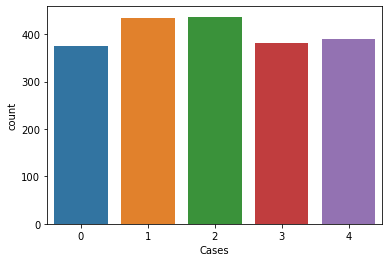

In [11]:
# categorical attributes visualization
sns.countplot(df['Cases'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

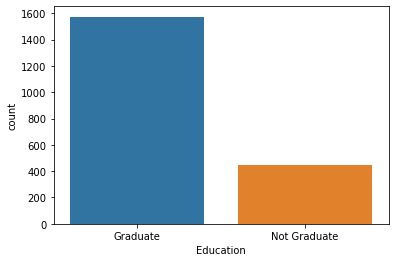

In [12]:
sns.countplot(df['Education'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_assets', ylabel='count'>

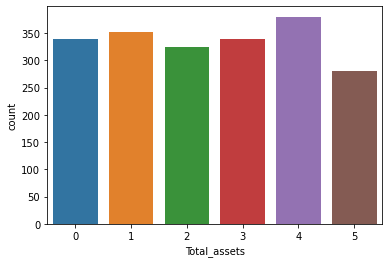

In [13]:
# rating
sns.countplot(df['Total_assets'])

In [ ]:
# yes / no
sns.countplot(df['Business_type'])

In [ ]:
# yes / no
sns.countplot(df['Credit'])

In [ ]:
# rating
sns.countplot(df['Rating_Reviewportal'])

In [ ]:
# rating
sns.countplot(df['Daily_Sales'])

In [ ]:
# rating
sns.countplot(df['Competition'])

In [ ]:
# rating
sns.countplot(df['Rent_Wages'])

In [ ]:
# rating
sns.countplot(df['Size_Shop'])

In [ ]:
# rating
sns.countplot(df['Location'])

In [ ]:
# rating
sns.countplot(df['Supply'])

In [ ]:
# value
sns.countplot(df['Total_Workers'])

In [ ]:
# rating
sns.countplot(df['No_customers'])

In [ ]:
# rating
sns.countplot(df['Freq_Supply_pay'])

In [ ]:
# rating
sns.countplot(df['Nature'])

In [ ]:
# target attribute
sns.countplot(df['Loan_Status'])

In [ ]:
# total income
df['Total_Income'] = df['Applicant_Income'] + df['Family_Income']
df.head()

In [ ]:
df['Applicant_Income_Log'] = np.log(df['Applicant_Income'])
sns.distplot(df['Applicant_Income_Log'])

In [ ]:
df['Loan_Amount_Log'] = np.log(df['Loan_Amount'])
sns.distplot(df['Loan_Amount'])

In [ ]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

In [ ]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log'])

# Correlation Matrix

In [ ]:
corr = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [ ]:
df.head()

In [ ]:
# drop unnecessary columns
cols = ['Applicant_Income', 'Family_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Total_Income', 'Sr_no']
df = df.drop(columns = cols, axis =  1)
df.head()

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Education', 'Loan_Status', 'Business_type', 'Credit']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

In [ ]:
# specify input and output attribute
x = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
y_test.value_counts()

In [ ]:
y_train.value_counts()

# Model Training

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)
    model.fit(x_train, y_train)
    print("Accuracy is ", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of the model
    # cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is ", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

In [ ]:
model = xgb.XGBRegressor(n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())
cm

# Confusion Matrix

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
y_train.value_counts()

# Saving the Model

In [ ]:
import pickle
saved_model = pickle.dumps(model)
saved_model_from_pickle = pickle.loads(saved_model)
saved_model_from_pickle.predict(x_test)

In [ ]:
import joblib
joblib.dump(model, 'modelb.pkl') 

In [ ]:
x_test